<a href="https://colab.research.google.com/github/felipecardosobcc/Atividade-02---Matem-tica-Computacional/blob/main/Atividade02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade 2**

## **A) Gradient Descent, Step-by-Step**

### Transforme em código Python o procedimento do slide 156 ao slide 213. O código deve rodar até o final, ou seja, até a condição de parada. Use duas condições de parada. Mostre a cada iteração o movimento da reta usando o Matplotlib. Imprima a cada iteração informações sobre o Step Size, Old e New Intercept. Teste duas Learning Rates. Para cada uma delas, plote a curva do próximo slide e compare os resultados.


### Caso base (Slide): learningRate = 0.1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def DerivadaSomas(intercept):
    soma1 = -2 * (1.4 - (intercept + (0.64 * 0.5)))
    soma2 = -2 * (1.9 - (intercept + (0.64 * 2.3)))
    soma3 = -2 * (3.2 - (intercept + (0.64 * 2.9)))
    return round(soma1 + soma2 + soma3, 2)

x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

intercept = 0
NewIntercept = intercept
OldIntercept = NewIntercept
learningRate = 0.1
StepSize = 0
NumberOfSteps = 0

plt.ion()

while True:
    print(f"Passo {NumberOfSteps}\n* StepSize = {StepSize}\n* Old Intercept = {OldIntercept}\n* New Intercept = {NewIntercept}\n")

    plt.clf()
    plt.scatter(x, y, color="black", s=80)

    xx = np.linspace(0, 3.5, 100)
    yy = NewIntercept + 0.64 * xx
    plt.plot(xx, yy, color="blue", linewidth=2)

    plt.title(f"Iteração {NumberOfSteps} — Intercept = {NewIntercept}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)

    plt.pause(0.5)

    Slope = DerivadaSomas(NewIntercept)
    StepSize = round(Slope * learningRate, 2)
    OldIntercept = NewIntercept
    NewIntercept = round(NewIntercept - StepSize, 2)

    NumberOfSteps += 1

    if NumberOfSteps > 1000 or abs(StepSize) < 0.001:
        break

plt.ioff()
plt.show()


[Output]:

Passo 0

*   StepSize = 0
*   Old Intercept = 0.0
*   New Intercept = 0



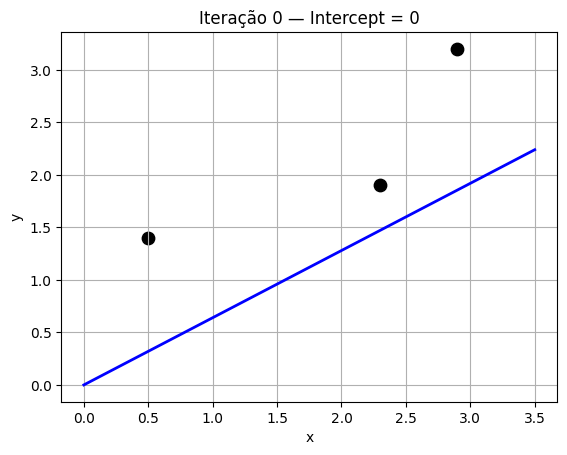

Passo 1

*   StepSize = -0.57
*   Old Intercept = 0
*   New Intercept = 0.57

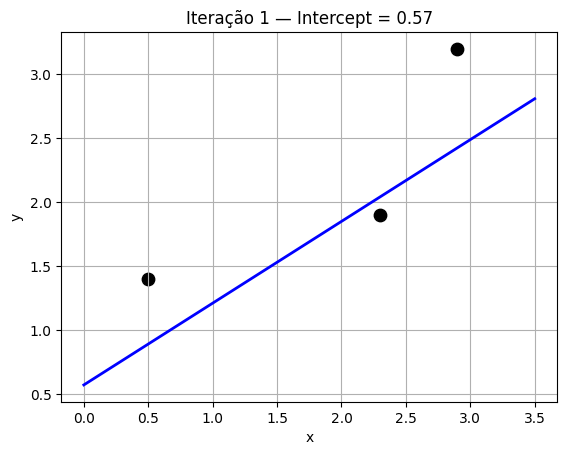

Passo 2

*   StepSize = -0.23
*   Old Intercept = 0.57
*   New Intercept = 0.8

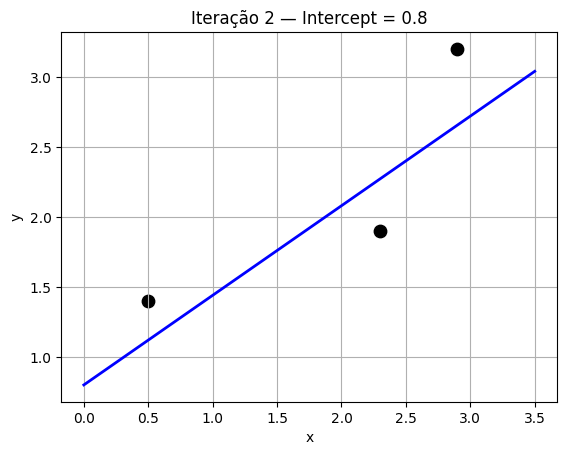

Passo 3

*   StepSize = -0.09
*   Old Intercept = 0.8
*   New Intercept = 0.89

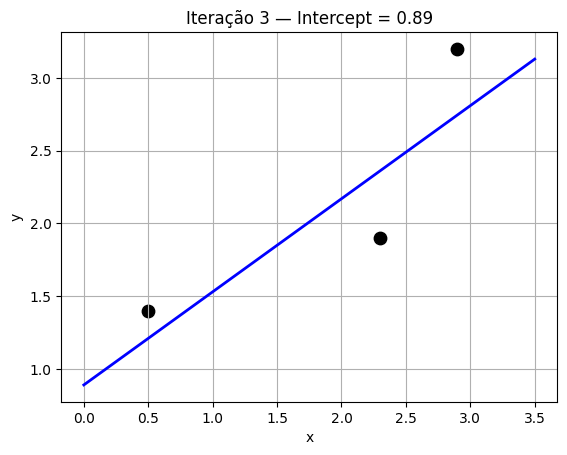

Passo 4

*   StepSize = -0.04
*   Old Intercept = 0.89
*   New Intercept = 0.93

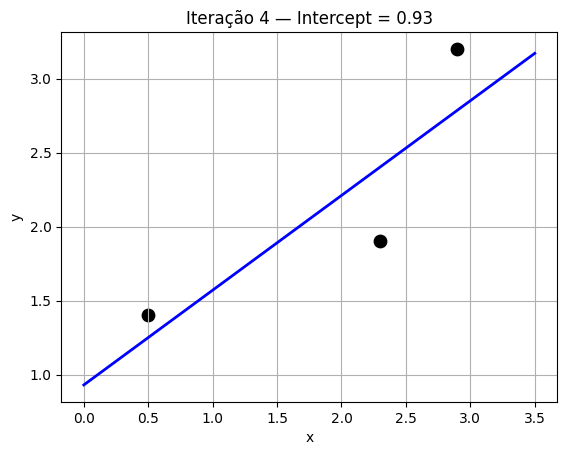

Passo 5

*   StepSize = -0.01
*   Old Intercept = 0.93
*   New Intercept = 0.94

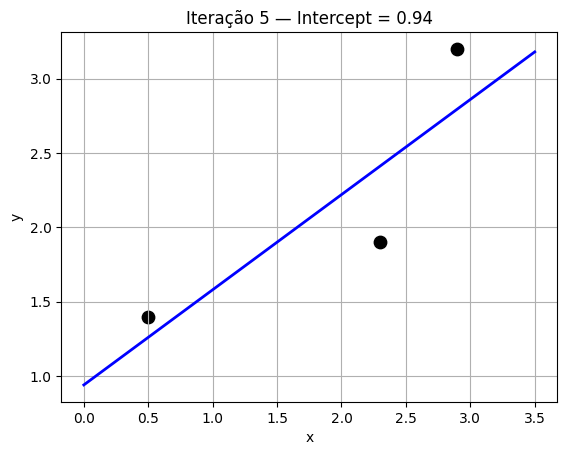

Passo 6

*   StepSize = -0.01
*   Old Intercept = 0.94
*   New Intercept = 0.95

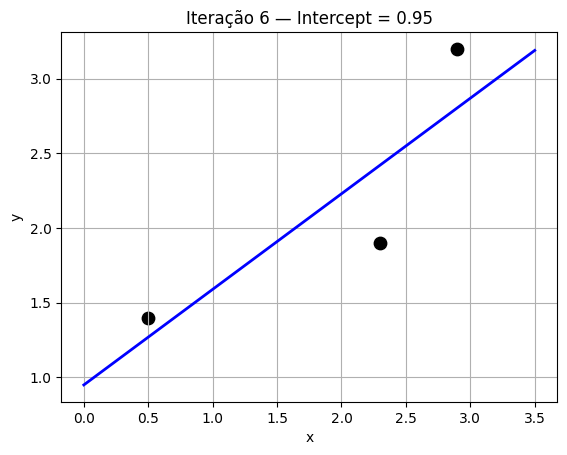



### Plot da Curva

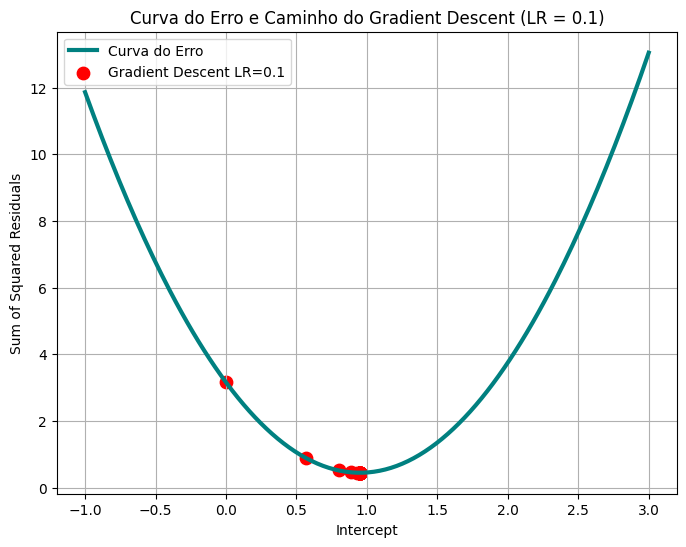

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

def cost(intercept):
    y_pred = intercept + 0.64 * x
    return np.sum((y - y_pred)**2)

intercepts = np.linspace(-1, 3, 200)
costs = [cost(b) for b in intercepts]

def DerivadaSomas(intercept):
    soma1 = -2 * (1.4 - (intercept + 0.64 * 0.5))
    soma2 = -2 * (1.9 - (intercept + 0.64 * 2.3))
    soma3 = -2 * (3.2 - (intercept + 0.64 * 2.9))
    return soma1 + soma2 + soma3

learningRate = 0.1
b = 0
trajectory = [b]

for _ in range(30):
    grad = DerivadaSomas(b)
    b = b - learningRate * grad
    trajectory.append(b)

plt.figure(figsize=(8,6))
plt.plot(intercepts, costs, color="teal", linewidth=3, label="Curva do Erro")
plt.scatter(trajectory, [cost(t) for t in trajectory], color="red", s=80, label="Gradient Descent LR=0.1")
plt.xlabel("Intercept")
plt.ylabel("Sum of Squared Residuals")
plt.title("Curva do Erro e Caminho do Gradient Descent (LR = 0.1)")
plt.grid(True)
plt.legend()
plt.show()


### Considerações

No caso base, com learning rate igual a 0.1, o processo de ajuste do intercepto acontece de maneira estável, suave e previsível. A cada iteração, o gradiente aponta que a reta está abaixo dos valores reais, portanto o intercepto precisa aumentar. Como o passo de atualização é relativamente pequeno, o movimento da reta é calmo: ela simplesmente sobe paralelamente, sem oscilações e sem ultrapassar a posição correta. O deslocamento é monotônico; em nenhum momento a reta passa do ponto ótimo e depois volta. Ela apenas se aproxima, cada vez mais lentamente, até praticamente coincidir com a reta que minimiza o erro quadrático.

A convergência acontece porque o learning rate é suficientemente pequeno para manter o processo sob controle. O fator de contração do método faz com que cada atualização seja menor do que a anterior, reduzindo gradualmente o tamanho do passo. O intercepto começa em zero, sobe para um número em torno de 0.57, depois 0.80, 0.89, 0.93 e finalmente estabiliza perto de 0.95, que é o valor ideal para os dados fornecidos. Essa aproximação progressiva mostra um comportamento típico de gradient descent em situações onde a taxa de aprendizado está bem calibrada: o método não é rápido demais a ponto de oscilar, nem lento demais a ponto de demorar muitas iterações para convergir.

### Primeiro caso: learningRate = 0.22

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def DerivadaSomas(intercept):
    soma1 = -2 * (1.4 - (intercept + (0.64 * 0.5)))
    soma2 = -2 * (1.9 - (intercept + (0.64 * 2.3)))
    soma3 = -2 * (3.2 - (intercept + (0.64 * 2.9)))
    return round(soma1 + soma2 + soma3, 2)

x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

intercept = 0
NewIntercept = intercept
OldIntercept = NewIntercept
learningRate = 0.22
StepSize = 0
NumberOfSteps = 0

plt.ion()

while True:
    print(f"Passo {NumberOfSteps}\n* StepSize = {StepSize}\n* Old Intercept = {OldIntercept}\n* New Intercept = {NewIntercept}\n")

    plt.clf()
    plt.scatter(x, y, color="black", s=80)

    xx = np.linspace(0, 3.5, 100)
    yy = NewIntercept + 0.64 * xx
    plt.plot(xx, yy, color="blue", linewidth=2)

    plt.title(f"Iteração {NumberOfSteps} — Intercept = {NewIntercept}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)

    plt.pause(0.5)

    Slope = DerivadaSomas(NewIntercept)
    StepSize = round(Slope * learningRate, 2)
    OldIntercept = NewIntercept
    NewIntercept = round(NewIntercept - StepSize, 2)

    NumberOfSteps += 1

    if NumberOfSteps > 1000 or abs(StepSize) < 0.001:
        break

plt.ioff()
plt.show()


 Passo 0
* StepSize = 0
* Old Intercept = 0
* New Intercept = 0

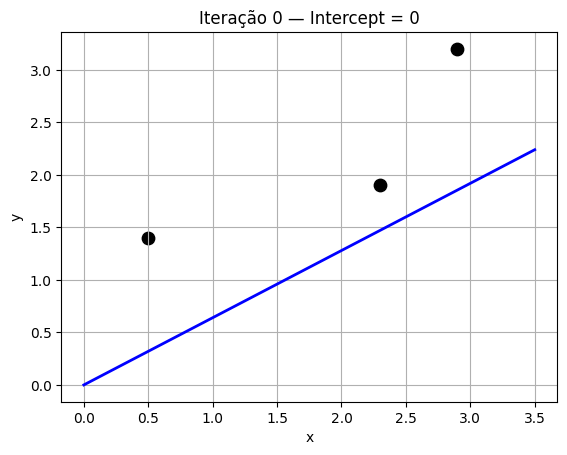

Passo 1
* StepSize = -1.25
* Old Intercept = 0
* New Intercept = 1.25

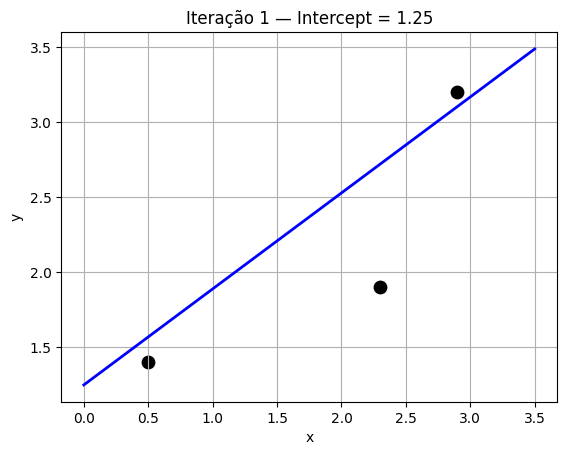

Passo 2
* StepSize = 0.4
* Old Intercept = 1.25
* New Intercept = 0.85

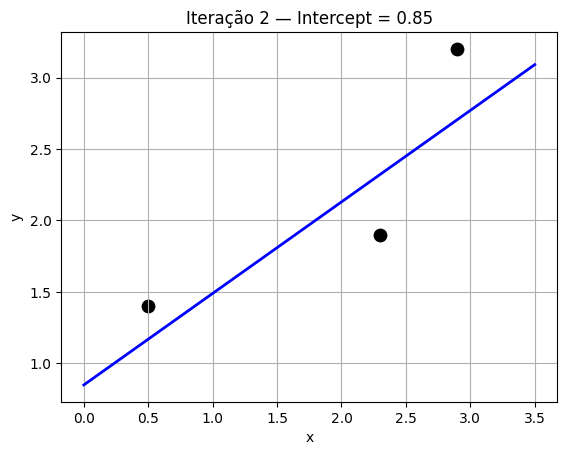

Passo 3
* StepSize = -0.13
* Old Intercept = 0.85
* New Intercept = 0.98

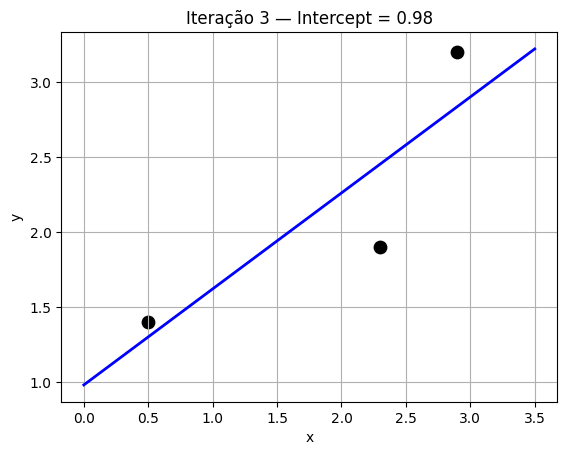

Passo 4
* StepSize = 0.04
* Old Intercept = 0.98
* New Intercept = 0.94

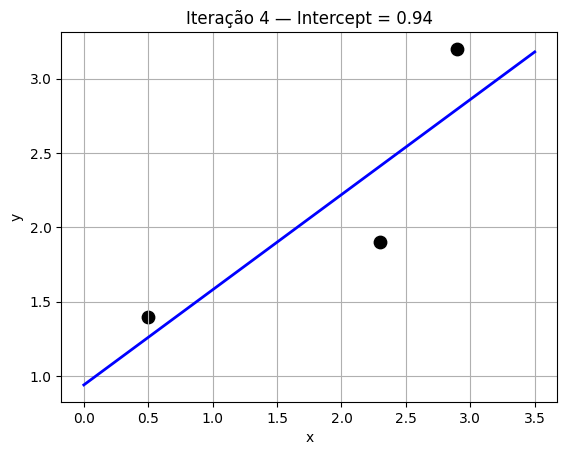

Passo 5
* StepSize = -0.01
* Old Intercept = 0.94
* New Intercept = 0.95

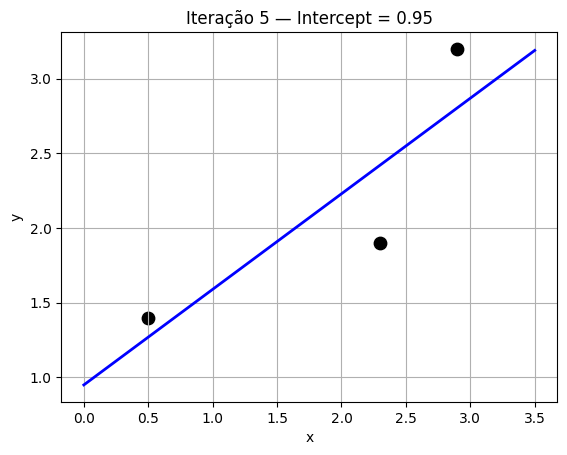


### Plot da Curva

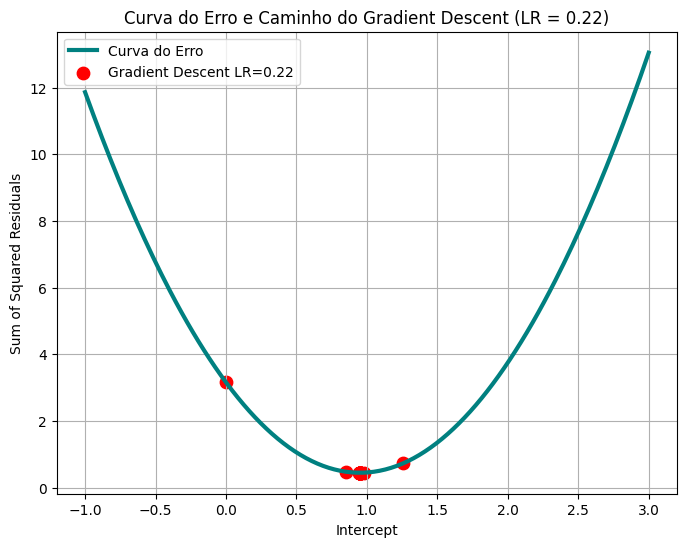

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

def cost(intercept):
    y_pred = intercept + 0.64 * x
    return np.sum((y - y_pred)**2)

intercepts = np.linspace(-1, 3, 200)
costs = [cost(b) for b in intercepts]

def DerivadaSomas(intercept):
    soma1 = -2 * (1.4 - (intercept + 0.64 * 0.5))
    soma2 = -2 * (1.9 - (intercept + 0.64 * 2.3))
    soma3 = -2 * (3.2 - (intercept + 0.64 * 2.9))
    return soma1 + soma2 + soma3

learningRate = 0.22
b = 0
trajectory = [b]

for _ in range(30):
    grad = DerivadaSomas(b)
    b = b - learningRate * grad
    trajectory.append(b)

plt.figure(figsize=(8,6))
plt.plot(intercepts, costs, color="teal", linewidth=3, label="Curva do Erro")
plt.scatter(trajectory, [cost(t) for t in trajectory], color="red", s=80, label="Gradient Descent LR=0.22")
plt.xlabel("Intercept")
plt.ylabel("Sum of Squared Residuals")
plt.title("Curva do Erro e Caminho do Gradient Descent (LR = 0.22)")
plt.grid(True)
plt.legend()
plt.show()


### Considerações

Com learning rate igual a 0.1, o movimento da reta ocorre de maneira gradual e em um único sentido. A aproximação do valor ideal acontece sem ultrapassagens: a reta se desloca para cima de forma constante e cada vez mais lenta, aproximando-se do ponto de equilíbrio de maneira monotônica. Esse comportamento resulta em uma convergência estável e previsível, sem oscilações.

Com learning rate igual a 0.22, o padrão muda. O primeiro deslocamento é maior e leva a reta além do valor ideal, produzindo uma ultrapassagem inicial. A partir disso, a reta passa a oscilar em torno da solução, alternando entre posições acima e abaixo do ponto ótimo. Essas oscilações diminuem progressivamente até desaparecer, o que caracteriza uma convergência ainda existente, porém não monotônica. O processo tende a ser mais rápido em número de iterações, mas envolve variações maiores e instabilidade momentânea durante o percurso.

### Segundo caso: learningRate = 0.05

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def DerivadaSomas(intercept):
    soma1 = -2 * (1.4 - (intercept + (0.64 * 0.5)))
    soma2 = -2 * (1.9 - (intercept + (0.64 * 2.3)))
    soma3 = -2 * (3.2 - (intercept + (0.64 * 2.9)))
    return round(soma1 + soma2 + soma3, 2)

x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

intercept = 0
NewIntercept = intercept
OldIntercept = NewIntercept
learningRate = 0.05
StepSize = 0
NumberOfSteps = 0

plt.ion()

while True:
    print(f"Passo {NumberOfSteps}\n* StepSize = {StepSize}\n* Old Intercept = {OldIntercept}\n* New Intercept = {NewIntercept}\n")

    plt.clf()
    plt.scatter(x, y, color="black", s=80)

    xx = np.linspace(0, 3.5, 100)
    yy = NewIntercept + 0.64 * xx
    plt.plot(xx, yy, color="blue", linewidth=2)

    plt.title(f"Iteração {NumberOfSteps} — Intercept = {NewIntercept}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)

    plt.pause(0.5)

    Slope = DerivadaSomas(NewIntercept)
    StepSize = round(Slope * learningRate, 2)
    OldIntercept = NewIntercept
    NewIntercept = round(NewIntercept - StepSize, 2)

    NumberOfSteps += 1

    if NumberOfSteps > 1000 or abs(StepSize) < 0.001:
        break

plt.ioff()
plt.show()


 Passo 0
* StepSize = 0
* Old Intercept = 0
* New Intercept = 0

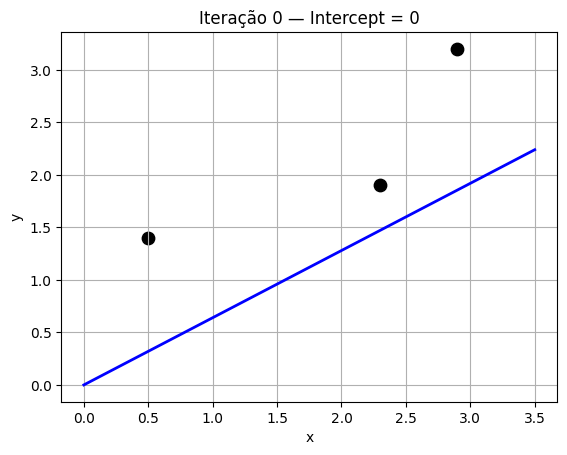

Passo 1
* StepSize = -0.29
* Old Intercept = 0
* New Intercept = 0.29

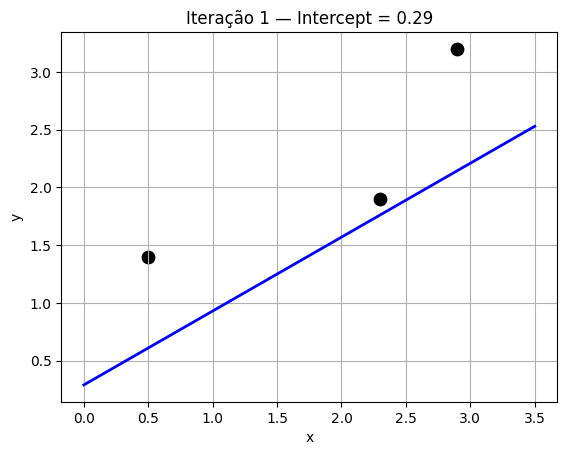

Passo 2
* StepSize = -0.2
* Old Intercept = 0.29
* New Intercept = 0.49

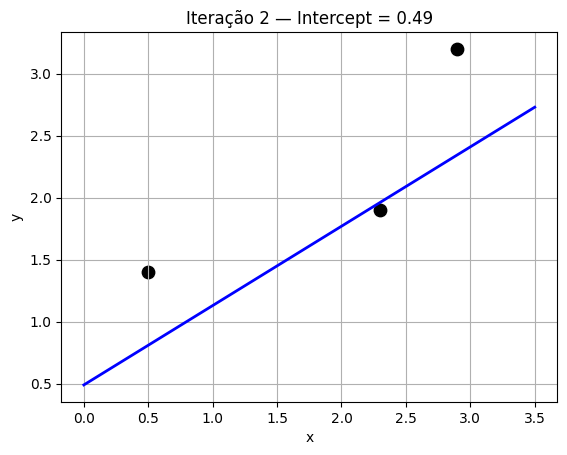

Passo 3
* StepSize = -0.14
* Old Intercept = 0.49
* New Intercept = 0.63

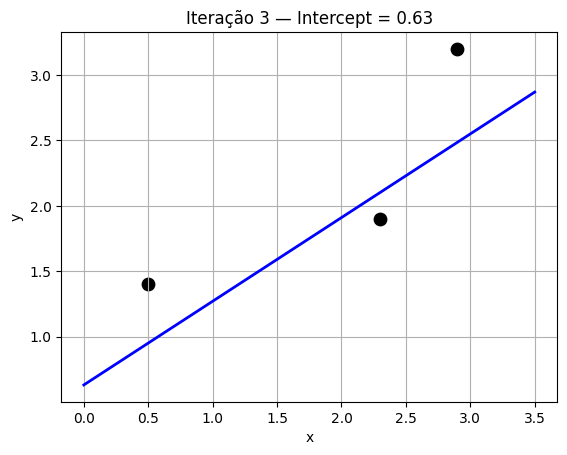

Passo 4
* StepSize = -0.1
* Old Intercept = 0.63
* New Intercept = 0.73

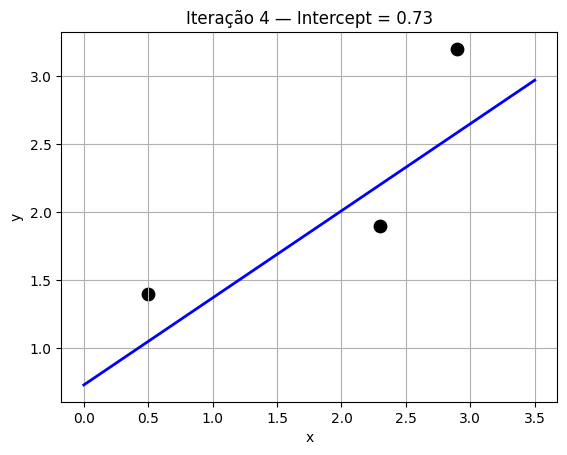

Passo 5
* StepSize = -0.07
* Old Intercept = 0.73
* New Intercept = 0.8

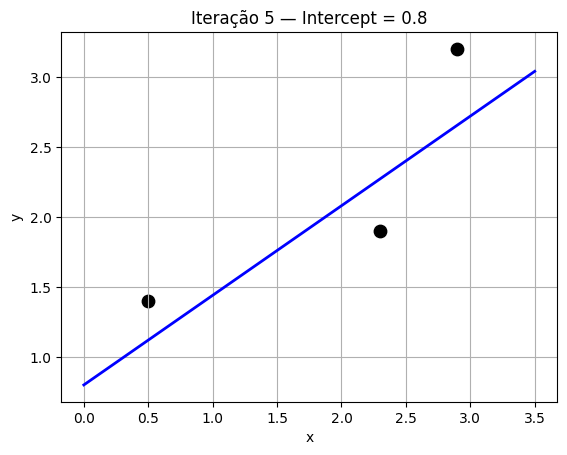

Passo 6
* StepSize = -0.05
* Old Intercept = 0.8
* New Intercept = 0.85

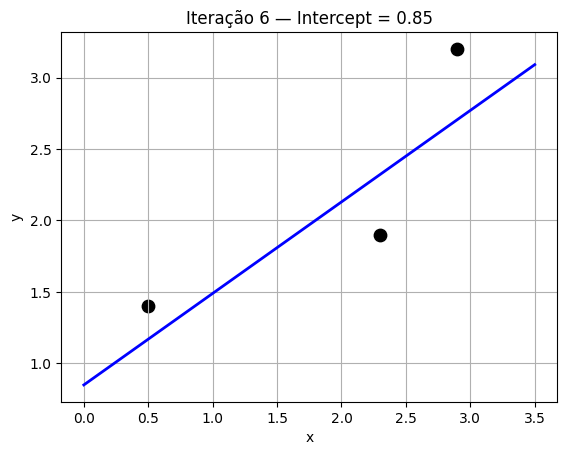

Passo 7
* StepSize = -0.03
* Old Intercept = 0.85
* New Intercept = 0.88

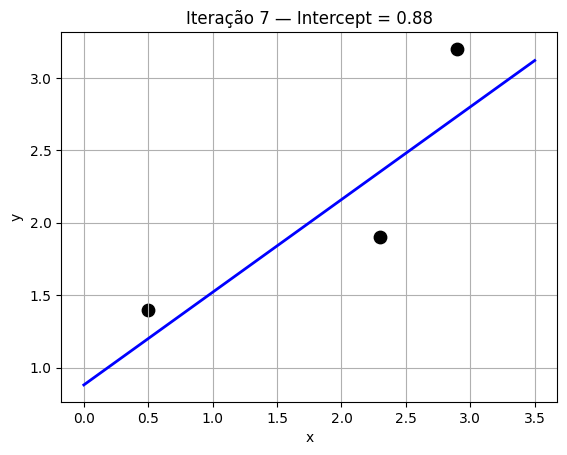

Passo 8
* StepSize = -0.02
* Old Intercept = 0.88
* New Intercept = 0.9

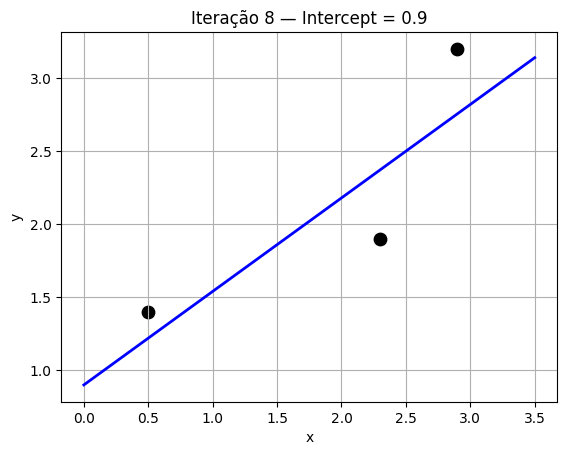

Passo 9
* StepSize = -0.01
* Old Intercept = 0.9
* New Intercept = 0.91

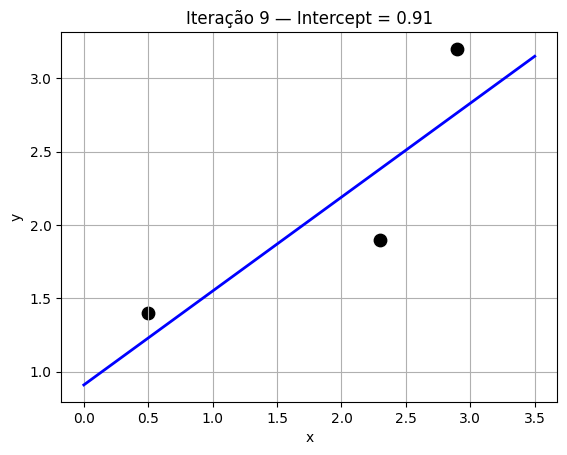

Passo 10
* StepSize = -0.01
* Old Intercept = 0.91
* New Intercept = 0.92

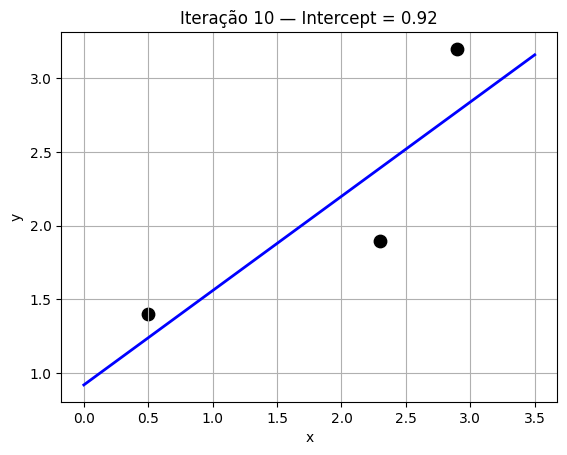

Passo 11
* StepSize = -0.01
* Old Intercept = 0.92
* New Intercept = 0.93

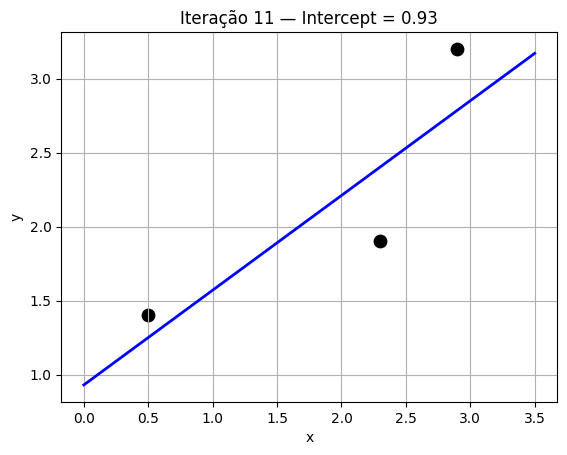

Passo 12
* StepSize = -0.01
* Old Intercept = 0.93
* New Intercept = 0.94

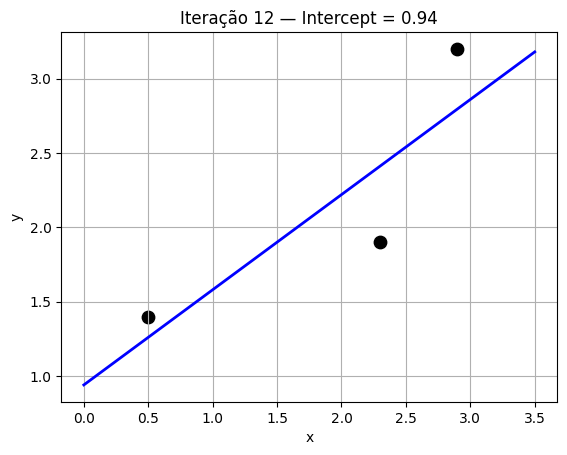

### Plot da Curva

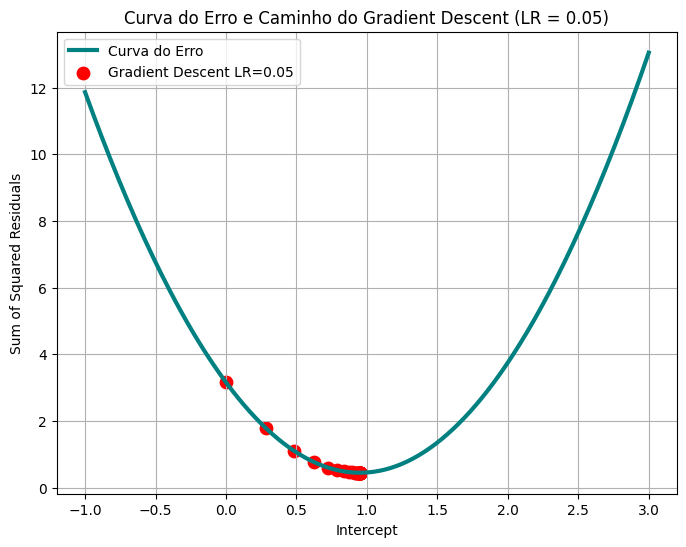

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

def cost(intercept):
    y_pred = intercept + 0.64 * x
    return np.sum((y - y_pred)**2)

intercepts = np.linspace(-1, 3, 200)
costs = [cost(b) for b in intercepts]

def DerivadaSomas(intercept):
    soma1 = -2 * (1.4 - (intercept + 0.64 * 0.5))
    soma2 = -2 * (1.9 - (intercept + 0.64 * 2.3))
    soma3 = -2 * (3.2 - (intercept + 0.64 * 2.9))
    return soma1 + soma2 + soma3

learningRate = 0.05
b = 0
trajectory = [b]

for _ in range(30):
    grad = DerivadaSomas(b)
    b = b - learningRate * grad
    trajectory.append(b)

plt.figure(figsize=(8,6))
plt.plot(intercepts, costs, color="teal", linewidth=3, label="Curva do Erro")
plt.scatter(trajectory, [cost(t) for t in trajectory], color="red", s=80, label="Gradient Descent LR=0.05")
plt.xlabel("Intercept")
plt.ylabel("Sum of Squared Residuals")
plt.title("Curva do Erro e Caminho do Gradient Descent (LR = 0.05)")
plt.grid(True)
plt.legend()
plt.show()


### Considerações

A comparação entre o caso base, com learning rate igual a 0.1, e o caso com learning rate igual a 0.05 mostra duas versões do mesmo comportamento fundamental, diferenciadas principalmente pelo ritmo. Em ambos os cenários, a trajetória do intercepto é monotônica e estável: a reta sempre se desloca para cima, sem oscilações, sem ultrapassar o valor ideal e sem qualquer sinal de instabilidade. A dinâmica segue exatamente a forma clássica do gradient descent em um regime seguro, no qual cada passo conduz o modelo mais perto da solução.

A distinção está na velocidade com que essa aproximação ocorre. Com learning rate igual a 0.1, os deslocamentos iniciais da reta são mais amplos, o que faz com que ela alcance rapidamente a vizinhança do intercepto ótimo. A cada iteração, há mudanças mais perceptíveis na posição da reta, e o processo converge em um número reduzido de passos. Já com learning rate igual a 0.05, o avanço é mais lento: a reta se move em incrementos menores, aproximando-se do valor ideal de maneira mais gradual. A convergência exige mais iterações, e a evolução gráfica entre uma etapa e outra é mais sutil.

## B) Gradient Descent, Step-by-Step and Stochastic Gradient Descent

### Transforme em código Python o procedimento do slide 302 ao slide 335. Faça para este caso tudo que foi pedido para o Caso A, menos o gráfico do slide 4.

### Caso base (Learning Rate = 0.01)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def dIntercept(intercept, slope):
    soma1 = -2 * (1.4 - (intercept + slope * 0.5))
    soma2 = -2 * (1.9 - (intercept + slope * 2.3))
    soma3 = -2 * (3.2 - (intercept + slope * 2.9))
    return round(soma1 + soma2 + soma3, 3)

def dSlope(intercept, slope):
    soma1 = -2 * 0.5 * (1.4 - (intercept + slope * 0.5))
    soma2 = -2 * 2.3 * (1.9 - (intercept + slope * 2.3))
    soma3 = -2 * 2.9 * (3.2 - (intercept + slope * 2.9))
    return round(soma1 + soma2 + soma3, 3)

x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

NewIntercept = 0
OldIntercept = 0
NewSlope = 1
OldSlope = 1
learningRate = 0.01
StepSizeIntercept = 0
StepSizeSlope = 0
NumberOfSteps = 0

plt.ion()

while True:
    print(f"Passo {NumberOfSteps}")
    print(f"* StepSizeIntercept = {StepSizeIntercept}")
    print(f"* StepSizeSlope     = {StepSizeSlope}")
    print(f"* Intercept         = {NewIntercept}")
    print(f"* Slope             = {NewSlope}\n")

    plt.clf()
    plt.scatter(x, y, color="black", s=80)

    xx = np.linspace(0, 3.5, 100)
    yy = NewIntercept + NewSlope * xx
    plt.plot(xx, yy, color="blue", linewidth=2)

    plt.title(f"Iteração {NumberOfSteps}\nIntercept = {NewIntercept}, Slope = {NewSlope}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.pause(0.00001)

    StepSizeIntercept = dIntercept(NewIntercept, NewSlope) * learningRate
    StepSizeSlope = dSlope(NewIntercept, NewSlope) * learningRate

    OldIntercept = NewIntercept
    NewIntercept = round(NewIntercept - StepSizeIntercept, 3)

    OldSlope = NewSlope
    NewSlope = round(NewSlope - StepSizeSlope, 3)

    NumberOfSteps += 1

    # Caso mude o segundo operador lógico para 'and', o programa executará 1000 instruções.
    if NumberOfSteps > 1000 or ((abs(StepSizeIntercept) < 0.001 and abs(StepSizeSlope) < 0.001)):
        break

plt.ioff()
plt.show()

### Primeiro Caso (Learning Rate = 0.02)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def dIntercept(intercept, slope):
    soma1 = -2 * (1.4 - (intercept + slope * 0.5))
    soma2 = -2 * (1.9 - (intercept + slope * 2.3))
    soma3 = -2 * (3.2 - (intercept + slope * 2.9))
    return round(soma1 + soma2 + soma3, 3)

def dSlope(intercept, slope):
    soma1 = -2 * 0.5 * (1.4 - (intercept + slope * 0.5))
    soma2 = -2 * 2.3 * (1.9 - (intercept + slope * 2.3))
    soma3 = -2 * 2.9 * (3.2 - (intercept + slope * 2.9))
    return round(soma1 + soma2 + soma3, 3)

x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

NewIntercept = 0
OldIntercept = 0
NewSlope = 1
OldSlope = 1
learningRate = 0.02
StepSizeIntercept = 0
StepSizeSlope = 0
NumberOfSteps = 0

plt.ion()

while True:
    print(f"Passo {NumberOfSteps}")
    print(f"* StepSizeIntercept = {StepSizeIntercept}")
    print(f"* StepSizeSlope     = {StepSizeSlope}")
    print(f"* Intercept         = {NewIntercept}")
    print(f"* Slope             = {NewSlope}\n")

    plt.clf()
    plt.scatter(x, y, color="black", s=80)

    xx = np.linspace(0, 3.5, 100)
    yy = NewIntercept + NewSlope * xx
    plt.plot(xx, yy, color="blue", linewidth=2)

    plt.title(f"Iteração {NumberOfSteps}\nIntercept = {NewIntercept}, Slope = {NewSlope}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.pause(0.015)

    StepSizeIntercept = dIntercept(NewIntercept, NewSlope) * learningRate
    StepSizeSlope = dSlope(NewIntercept, NewSlope) * learningRate

    OldIntercept = NewIntercept
    NewIntercept = round(NewIntercept - StepSizeIntercept, 3)

    OldSlope = NewSlope
    NewSlope = round(NewSlope - StepSizeSlope, 3)

    NumberOfSteps += 1

    if NumberOfSteps > 1000 or ((abs(StepSizeIntercept) < 0.001 and abs(StepSizeSlope) < 0.001)):
        break

plt.ioff()
plt.show()

No total, foram realizadas 134 iterações, com o seguinte resultado final:

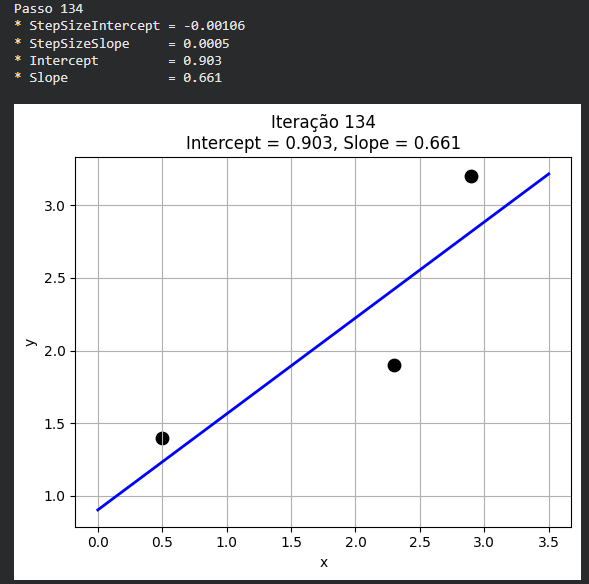

### Segundo Caso (Learning Rate = 0.03)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def dIntercept(intercept, slope):
    soma1 = -2 * (1.4 - (intercept + slope * 0.5))
    soma2 = -2 * (1.9 - (intercept + slope * 2.3))
    soma3 = -2 * (3.2 - (intercept + slope * 2.9))
    return round(soma1 + soma2 + soma3, 3)

def dSlope(intercept, slope):
    soma1 = -2 * 0.5 * (1.4 - (intercept + slope * 0.5))
    soma2 = -2 * 2.3 * (1.9 - (intercept + slope * 2.3))
    soma3 = -2 * 2.9 * (3.2 - (intercept + slope * 2.9))
    return round(soma1 + soma2 + soma3, 3)

x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

NewIntercept = 0
OldIntercept = 0
NewSlope = 1
OldSlope = 1
learningRate = 0.03
StepSizeIntercept = 0
StepSizeSlope = 0
NumberOfSteps = 0

plt.ion()

while True:
    print(f"Passo {NumberOfSteps}")
    print(f"* StepSizeIntercept = {StepSizeIntercept}")
    print(f"* StepSizeSlope     = {StepSizeSlope}")
    print(f"* Intercept         = {NewIntercept}")
    print(f"* Slope             = {NewSlope}\n")

    plt.clf()
    plt.scatter(x, y, color="black", s=80)

    xx = np.linspace(0, 3.5, 100)
    yy = NewIntercept + NewSlope * xx
    plt.plot(xx, yy, color="blue", linewidth=2)

    plt.title(f"Iteração {NumberOfSteps}\nIntercept = {NewIntercept}, Slope = {NewSlope}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.pause(0.00001)

    StepSizeIntercept = dIntercept(NewIntercept, NewSlope) * learningRate
    StepSizeSlope = dSlope(NewIntercept, NewSlope) * learningRate

    OldIntercept = NewIntercept
    NewIntercept = round(NewIntercept - StepSizeIntercept, 3)

    OldSlope = NewSlope
    NewSlope = round(NewSlope - StepSizeSlope, 3)

    NumberOfSteps += 1

    if NumberOfSteps > 1000 or ((abs(StepSizeIntercept) < 0.001 and abs(StepSizeSlope) < 0.001)):
        break

plt.ioff()
plt.show()

No total, foram executadas 100 iterações, com o seguinte resultado final:

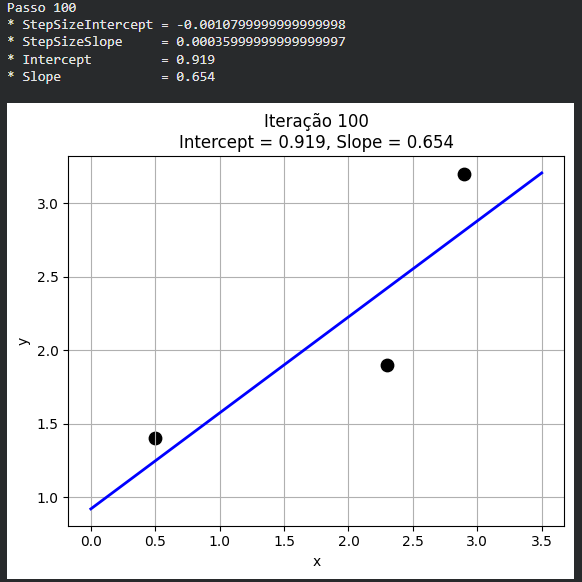

### Adapte o código para ele rodar como o Gradiente Descendente Estocástico. Faça o mesmo usando mini-batch de 2 samples. Compare os resultados.

Código adaptado utilizando learning rate igual a 0.1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def dIntercept_sample(intercept, slope, xi, yi):
    return -2 * (yi - (intercept + slope * xi))

def dSlope_sample(intercept, slope, xi, yi):
    return -2 * xi * (yi - (intercept + slope * xi))

x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

NewIntercept = 0
OldIntercept = 0
NewSlope = 1
OldSlope = 1
learningRate = 0.1
StepSizeIntercept = 0
StepSizeSlope = 0
NumberOfSteps = 0

plt.ion()

while True:
    print(f"Passo {NumberOfSteps}")
    print(f"* StepSizeIntercept = {StepSizeIntercept}")
    print(f"* StepSizeSlope     = {StepSizeSlope}")
    print(f"* Old Intercept     = {OldIntercept}")
    print(f"* New Intercept     = {NewIntercept}")
    print(f"* Old Slope         = {OldSlope}")
    print(f"* New Slope         = {NewSlope}\n")

    plt.clf()
    plt.scatter(x, y, color="black", s=80)

    xx = np.linspace(0, 3.5, 100)
    yy = NewIntercept + NewSlope * xx
    plt.plot(xx, yy, color="blue", linewidth=2)

    plt.title(f"Iteração {NumberOfSteps}\nIntercept = {NewIntercept}, Slope = {NewSlope}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.pause(0.0001)

    batch_idx = np.random.choice(len(x), size=2, replace=False)
    xb = x[batch_idx]
    yb = y[batch_idx]

    grad_b = 0
    grad_m = 0
    for xi, yi in zip(xb, yb):
        grad_b += dIntercept_sample(NewIntercept, NewSlope, xi, yi)
        grad_m += dSlope_sample(NewIntercept, NewSlope, xi, yi)

    grad_b /= 2
    grad_m /= 2

    StepSizeIntercept = grad_b * learningRate
    StepSizeSlope = grad_m * learningRate

    OldIntercept = NewIntercept
    NewIntercept = round(NewIntercept - StepSizeIntercept, 3)

    OldSlope = NewSlope
    NewSlope = round(NewSlope - StepSizeSlope, 3)

    NumberOfSteps += 1

    if NumberOfSteps > 1000 or (abs(StepSizeIntercept) < 0.001 and abs(StepSizeSlope) < 0.001):
        break

plt.ioff()
plt.show()


No total, foram 121 iterações, com os seguintes resultados:

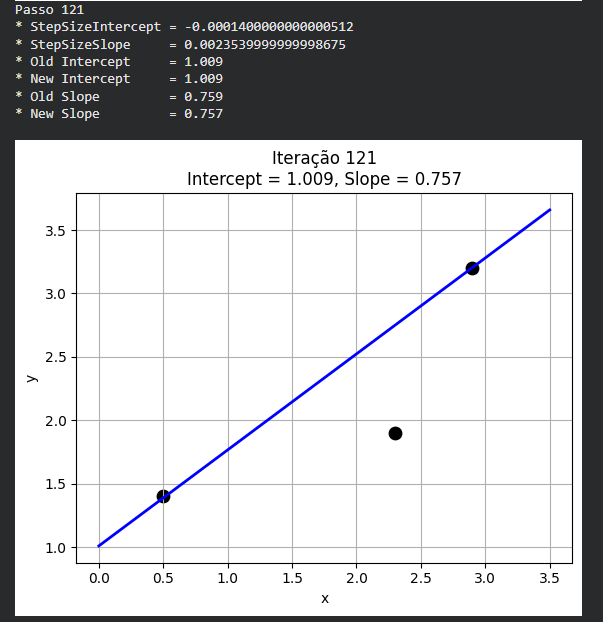

### Segundo caso (Learning Rate = 0.02)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def dIntercept_sample(intercept, slope, xi, yi):
    return -2 * (yi - (intercept + slope * xi))

def dSlope_sample(intercept, slope, xi, yi):
    return -2 * xi * (yi - (intercept + slope * xi))

x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

NewIntercept = 0
OldIntercept = 0
NewSlope = 1
OldSlope = 1
learningRate = 0.02
StepSizeIntercept = 0
StepSizeSlope = 0
NumberOfSteps = 0

plt.ion()

while True:
    print(f"Passo {NumberOfSteps}")
    print(f"* StepSizeIntercept = {StepSizeIntercept}")
    print(f"* StepSizeSlope     = {StepSizeSlope}")
    print(f"* Old Intercept     = {OldIntercept}")
    print(f"* New Intercept     = {NewIntercept}")
    print(f"* Old Slope         = {OldSlope}")
    print(f"* New Slope         = {NewSlope}\n")

    plt.clf()
    plt.scatter(x, y, color="black", s=80)

    xx = np.linspace(0, 3.5, 100)
    yy = NewIntercept + NewSlope * xx
    plt.plot(xx, yy, color="blue", linewidth=2)

    plt.title(f"Iteração {NumberOfSteps}\nIntercept = {NewIntercept}, Slope = {NewSlope}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.pause(0.0001)

    batch_idx = np.random.choice(len(x), size=2, replace=False)
    xb = x[batch_idx]
    yb = y[batch_idx]

    grad_b = 0
    grad_m = 0
    for xi, yi in zip(xb, yb):
        grad_b += dIntercept_sample(NewIntercept, NewSlope, xi, yi)
        grad_m += dSlope_sample(NewIntercept, NewSlope, xi, yi)

    grad_b /= 2
    grad_m /= 2

    StepSizeIntercept = grad_b * learningRate
    StepSizeSlope = grad_m * learningRate

    OldIntercept = NewIntercept
    NewIntercept = round(NewIntercept - StepSizeIntercept, 3)

    OldSlope = NewSlope
    NewSlope = round(NewSlope - StepSizeSlope, 3)

    NumberOfSteps += 1

    if NumberOfSteps > 1000 or (abs(StepSizeIntercept) < 0.001 and abs(StepSizeSlope) < 0.001):
        break

plt.ioff()
plt.show()


No total, foram 1000 iterações, com os seguintes resultados:

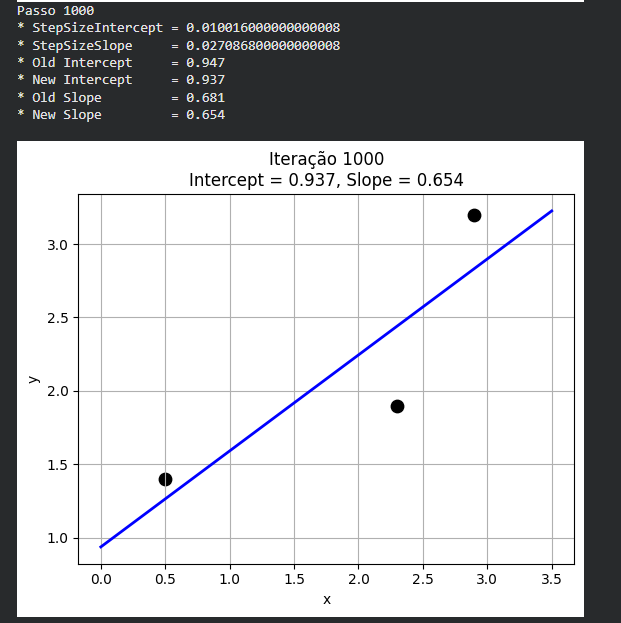

### Comparação de Resultados

Com o learning rate igual a 0.1, o gradiente descendente estocástico avança com passos maiores a cada atualização. Como o cálculo do gradiente usa apenas duas amostras por iteração, o valor estimado do gradiente varia bastante, e essa variação é amplificada pelo tamanho do passo. O resultado é um processo mais instável: o intercepto e o slope oscilam de forma mais intensa, e a reta exibida no gráfico muda de posição e inclinação de maneira mais brusca. Apesar desse comportamento irregular, o método ainda tende a se aproximar da região de mínimo, mas o faz com flutuações amplas ao redor do ponto ideal.

Quando o learning rate é reduzido para 0.02, a dinâmica muda consideravelmente. Os passos ficam menores, e isso faz com que o ruído inerente ao gradiente estocástico tenha um impacto muito menor sobre a movimentação dos parâmetros. O intercepto e o slope passam a se mover de forma mais suave, com oscilações menores e atualizações mais graduais. A reta no gráfico se ajusta de maneira mais estável, com deslocamentos consistentes e menos abruptos. A convergência tende a ser mais lenta, mas o percurso até a solução torna-se muito mais controlado.